In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
epsilon = 1e-5

In [2]:
import pydot
from IPython.display import Image, display

def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

# $k$近邻

In [3]:
def kNN(x, X, Y, k, p): # y [0, N-1]
    m,n = X.shape
    class_N = np.max(Y) + 1
    diffs = np.abs(np.tile(x, (m, 1)) - X)
    if p is np.inf:
        diss = np.max(diffs, axis=1)
    else:
        diss = np.power(np.sum(np.power(diffs, p), axis=1), 1./p)
    args = np.argsort(diss)[:k]
    countY = np.zeros(class_N)
    for index in args:
        countY[index] = countY[index] + 1
    return np.argmax(countY)

### 例3.1

In [4]:
X = np.array([
    [5,1],
    [4,4],
])
Y = np.array([
    [0],
    [1],
])

In [5]:
for i in range(1,6):
    print("%d -> %d"%(i, kNN(x=np.array([1,1]), X=X, Y=Y, k=1, p=i)))

1 -> 0
2 -> 0
3 -> 1
4 -> 1
5 -> 1


#### 最近邻性能分析
《西瓜书$P_{226}$》给出了最近邻的性能分析，这里只是只是表示最近邻（用距离最近的训练样本的类别作为输入的类别）

> 在**大样本**（独立同分布，且样本量无穷）下最近邻规则的泛化错误率不超过贝叶斯最优分类器（所有概率关系已知）的错误率的两倍

测试样本为$x$，其最近邻样本为$z$，则最近邻分类器出错的概率为$z$的标记与$x$不同的概率
$$
r(x) = 1 - \sum_{c\in \mathcal{Y}}P(c \mid x)P(c\mid z)
$$
这里的概率均是在所有概率已知的情况下的分析，泛化错误率，则贝叶斯最优分类器的结果为
$$
c^* = \underset{c\in\mathcal{Y}}{\arg\max}P(c\mid x)
$$
对应的错误率为
$$
r^*(x) = 1 - P(c^*\mid x)
$$

由于样本符合独立同分布且有无限的样本，所以对任意的$x$和任意小正整数$\delta$，在$x$附近$\delta$范围内总能找到一个训练样本；换成人话就是，在无限样本且符合独立同分布下，样本$x$与其近邻$z$无限靠近，故
$$
\begin{split}
r(x) & = 1- \sum_{c\in\mathcal{Y}}P(c\mid x)P(c\mid z) \\
    & \approx 1 - \sum_{c\in\mathcal{Y}}P^2(c\mid x) \quad //\text{$x$与$z$无限靠近} \\
    & \le 1 - P^2(c^*\mid x) \quad //\text{$c^*\in \mathcal{Y}$} \\ 
    & = (1 + P(c^* \mid x))(1-P(c^*\mid x)) \\
    & \le 2(1 - P(c^*\mid x)) \\
    & = 2r^*(x)
\end{split}
$$

还有个关于最近邻的不等式，是《西瓜书》习题上的，是上面不等式的细化，设R为在整个n个样本集中的错误率的期望$R = E[r(x)]$
> $$R^* \le R \le R^*(2-\frac{|\mathcal{Y}|}{|\mathcal{Y}|-1})$$

整理$r(x)$
$$
\begin{split}
r(x) & \approx 1 - \sum_{c\in \mathcal{Y}}P^2(c\mid x) \\
    & = 1 - P^2(c^*\mid x) - \sum_{c\neq c^*}P^2(c\mid x) \\
\end{split}
$$
由柯西-施瓦茨不等式得到
$$
\left( \sum_{i=1}^N a_ib_i \right)^2 \le \left( \sum_{i=1}^N a_i^2 \right)\left( \sum_{i=1}^N b_i^2 \right) \\
\left( \sum_{i=1}^N a_i \right)^2 \le \left( \sum_{i=1^N} a_i^2 \right) \cdot N
$$
可以得到
$$
\begin{split}
\sum_{c\neq c^*}P^2(c\mid x) & \geq \frac{1}{|\mathcal{Y}|-1} \left( \sum_{c\neq c^*}P(c\mid x) \right)^2 \\
    & = \frac{1}{|\mathcal{Y}|-1} \left( 1-P(c^*\mid x) \right)^2 \\
    & = \frac{1}{|\mathcal{Y}|-1}{r^*}^2(x)
\end{split}
$$
最后有
$$
\begin{split}
r(x) & \approx 1 - \sum_{c\in \mathcal{Y}}P^2(c\mid x) \\
    & = 1 - P^2(c^*\mid x) - \sum_{c\neq c^*}P^2(c\mid x) \\
    & \le 1 - (1 - r^*(x))^2 - \frac{1}{|\mathcal{Y}|-1}{r^*}^2(x) \\
    & = 2r*(x) - \frac{|\mathcal{Y}|}{|\mathcal{Y}-1|}{r^*}^2(x)
\end{split}
$$
则对所有数据集
$$
\begin{split}
R & = E[r(x)] \\
    & \le 2E[r^*(x)] - \frac{|\mathcal{Y}|}{|\mathcal{Y}-1|}E[{r^*}^2(x)] \\
    & = 2E[r^*(x)] - \frac{|\mathcal{Y}|}{|\mathcal{Y}-1|}\Big(\mathrm{Var}[{r^*}(x)] + E^2[{r^*}(x)]\Big) \\
    & \le 2E[r^*(x)] - \frac{|\mathcal{Y}|}{|\mathcal{Y}-1|}E^2[{r^*}(x)] \\
    & = 2R^* - \frac{|\mathcal{Y}|}{|\mathcal{Y}-1|}{R^*}^2
\end{split}
$$

## kd树

In [6]:
A = np.array([
    [2,3],
    [5,4],
    [9,6],
    [4,7],
    [8,1],
    [7,2]
])

In [7]:
def D(X):
    return np.mean(np.power(X - np.mean(X,axis=0), 2), axis=0)

In [8]:
class Node(object):
    def __init__(self, p=None, dim=None, lc=None, rc=None):
        self.p = p
        self.dim = dim
        self. lc = lc
        self.rc = rc
        self.visited = False

In [9]:
def kd_Tree(X):
    if(len(X) == 0):
        return None;
    N = X.shape[0]
    ## 选择需要划分的维度
    Ds = D(X)
    dim = np.argmax(Ds)
    X = np.array(sorted(X, key=lambda x:x[dim]))
    root = Node()
    root.p = X[int(N/2)]
    root.dim = dim
    root.lc = kd_Tree(X[:int(N/2)])
    root.rc = kd_Tree(X[int(N/2)+1:])
    return root

### 搜索
搜索也很简单，首先按照二分的方法搜索找到最优的候选叶子节点，然后向上回溯，查看父节点的未访问到的节点是否有小于候选节点与目标节点距离，小于则更新候选节点
判断目标节点到该轴的距离是否小于最小距离

In [10]:
def kd_search(root, x):
    global min_dis
    global min_node
    min_dis = np.inf
    min_node = None
    def _search(t): ## 递归
        global min_dis
        global min_node
        if ((x[t.dim] < t.p[t.dim]) & (t.lc is None)) | ((x[t.dim] >= t.p[t.dim]) & (t.rc is None)):  ## 叶子节点，二分查找的最优候选节点
            dis = np.sqrt(np.sum(np.power(t.p - x, 2)))
            if dis <= min_dis:
                min_dis = dis
                min_node = t.p
            t.visited = True
            return
        else:
            if x[t.dim] < t.p[t.dim]:
                _search(t.lc)
            else:
                _search(t.rc)
        if np.abs(x[t.dim] - t.p[t.dim]) >= min_dis:
            t.visited = True
        else:
            if x[t.dim] > t.p[t.dim]:
                _search(t.rc)
            else:
                _search(t.lc)
        dis = np.sqrt(np.sum(np.power(t.p - x, 2)))
        if dis <= min_dis:
            min_dis = dis
            min_node = t.p
        t.visited = True
    _search(root)
    return min_node, min_dis

In [11]:
tree = kd_Tree(A)

In [12]:
kd_search(tree, np.array([4,3]))

(array([5, 4]), 1.4142135623730951)

In [13]:
dot = pydot.Dot()
global level
level = 1
def create_dot(p):
    global level
    p_name = "%d # %d, %s" % (level, p.dim, str(p.p))
    dot.add_node(pydot.Node(name=p_name))
    if p.lc is not None:
        level = level + 1
        c = p.lc
        c_name = "%d # %d, %s" % (level, c.dim, str(c.p))
        dot.add_edge(pydot.Edge(dst=c_name, src=p_name))
        create_dot(c)
        level = level -1
    if p.rc is not None:
        level = level + 1
        c = p.rc
        c_name = "%d # %d, %s" % (level, c.dim, str(c.p))
        dot.add_edge(pydot.Edge(dst=c_name, src=p_name))
        create_dot(c)
        level = level -1
        

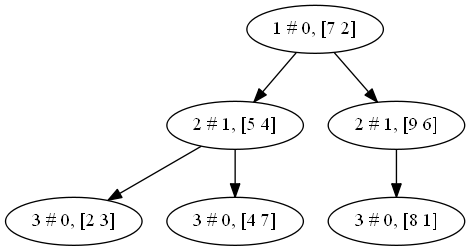

In [14]:
create_dot(tree)
viewPydot(dot)